In [49]:
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data=pd.read_csv("firstcry.csv")
data.head()

,Status,Brand,Title,Discounted Price,Original Price,Discount Percent,Club Price
0,Added to Cart | Shortlisted | Already Viewed,Pine Kids Cotton,Woven Half Sleeves Checks Shirt With T Shirt -...,779.22,999,22% Off,759.24
1,Added to Cart | Shortlisted | Already Viewed,Babyoye Cotton,otton with Eco Jiva Finish Half Sleeves T-Shir...,710.21,899,21% Off,692.23
2,Added to Cart | Shortlisted | Already Viewed,Pine Kids Viscose,Woven Half Sleeves Printed Shirt - White,503.16,599,16% Off,491.18
3,Added to Cart | Shortlisted | Already Viewed |...,Doodle Poodle,100% Cotton Knit Sleeveless T-Shirt & Shorts S...,242.73,279,13% Off,237.15
4,Added to Cart | Shortlisted | Already Viewed,Pine Kids Cotton,Woven Half Sleeves Checkered Shirt with Text P...,779.22,999,22% Off,759.24


In [23]:
data.shape

(909, 7)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Status            909 non-null    object 
 1   Brand             909 non-null    object 
 2   Title             909 non-null    object 
 3   Discounted Price  909 non-null    float64
 4   Original Price    909 non-null    int64  
 5   Discount Percent  909 non-null    object 
 6   Club Price        909 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 49.8+ KB


In [25]:
data.duplicated().sum()

64

In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.duplicated().sum()

0

In [28]:
data.isna().sum()

Status              0
Brand               0
Title               0
Discounted Price    0
Original Price      0
Discount Percent    0
Club Price          0
dtype: int64

In [29]:
data["Discount Percent"]=data["Discount Percent"].str.replace("% Off","").astype(int)

In [31]:
def get_sleeve_type(name):
    name = name.lower()
    if "sleeveless" in name:
        return "Sleeveless"
    elif "half sleeves" in name or "half sleeve" in name:
        return "Half Sleeves"
    elif "full sleeves" in name or "full sleeve" in name:
        return "Full Sleeves"
    elif "singlet sleeves" in name:
        return "Singlet Sleeves"
    else:
        return "Unknown"

def get_material(name):
    name = name.lower()
    if "cotton" in name:
        return "Cotton"
    elif "jersey knit" in name or "jersey" in name:
        return "Jersey Knit"
    elif "organza" in name:
        return "Organza"
    elif "sinker knit" in name:
        return "Sinker Knit"
    else:
        return "Unknown"

def get_item_type(name):
    name = name.lower()
    if "frock" in name:
        return "Frock"
    elif "shorts" in name:
        return "Shorts"
    elif "t-shirt" in name or "top" in name:
        return "T-Shirt/Top"
    elif "swimsuit" in name:
        return "Swimsuit"
    elif "jacket" in name or "dungree" in name:
        return "Jacket/Dungree"
    else:
        return "Other"

In [32]:
data["Sleeve type"]=data["Title"].apply(get_sleeve_type)
data["Material"]=data["Title"].apply(get_material)
data["variety_of_things"]=data["Title"].apply(get_item_type)

In [38]:
#Filter rows where material is Unknown
unknown_titles = data[data['Material'] == 'Unknown']['Title'].dropna().str.lower()

#Combine all titles into one string
all_text = ' '.join(unknown_titles)

#Extract words
words = re.findall(r'\b[a-z]+\b', all_text)

#Count most common words
common_words = Counter(words).most_common(50)

In [40]:
material_keywords = [
    "Woven", "Knit", "Cotton", "Blend", "Eco","carrying", "Mesh",
    "x", "swimsuit", "skin", "natural", 
    "pack", "months", "capacity", "ratings", "years", 
    "cream", "blue", "body", "cm","sizes","l" ]

In [41]:
def better_extract_material(title):
    if pd.isna(title):
        return "Unknown"
    for material in material_keywords:
        if material.lower() in title.lower():
            return material
    return "Unknown"

data['Material'] = data['Title'].apply(better_extract_material)

In [43]:
data["Material"]=data["Material"].replace("x","Top picks", regex=True)
data["Material"]=data["Material"].replace("l","Top picks", regex=True)
data["Material"]=data["Material"].replace("cm","Top picks", regex=True)
data["Material"]=data["Material"].replace("Mesh","Top picks", regex=True)
data["Material"]=data["Material"].replace("cream","Top picks", regex=True)

In [46]:
data=data.drop(["Status","Title"], axis=1)

In [45]:
data.nunique()

Status                 4
Brand                472
Title                835
Discounted Price     634
Original Price       268
Discount Percent      71
Club Price           631
Sleeve type            5
Material              16
variety_of_things      5
dtype: int64

In [47]:
data.head()

,Brand,Discounted Price,Original Price,Discount Percent,Club Price,Sleeve type,Material,variety_of_things
0,Pine Kids Cotton,779.22,999,22,759.24,Half Sleeves,Woven,Other
1,Babyoye Cotton,710.21,899,21,692.23,Half Sleeves,Eco,T-Shirt/Top
2,Pine Kids Viscose,503.16,599,16,491.18,Half Sleeves,Woven,Other
3,Doodle Poodle,242.73,279,13,237.15,Sleeveless,Knit,Shorts
4,Pine Kids Cotton,779.22,999,22,759.24,Half Sleeves,Woven,Other


## EDA
### Univariate Analysis

### Numerical

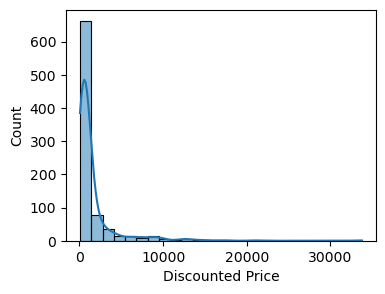

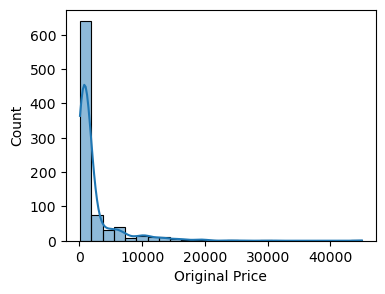

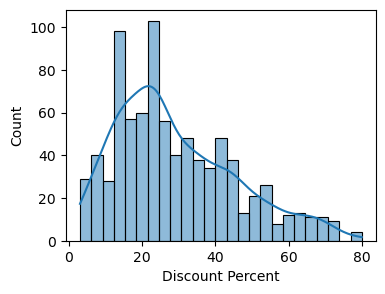

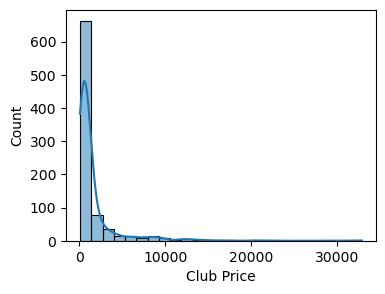

In [52]:
for i in data.select_dtypes(include="number"):
    plt.figure(figsize=(4,3))
    sns.histplot(data[i], kde=True, bins=25)

### Categorical

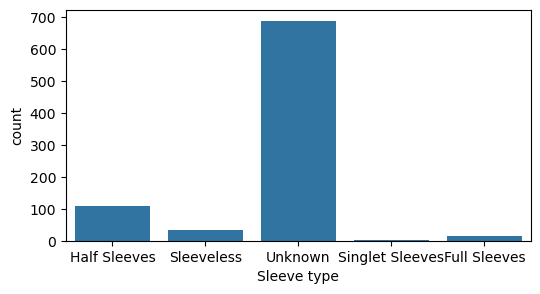

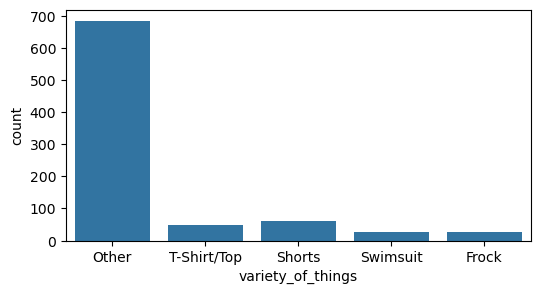

In [56]:
cat=["Sleeve type","variety_of_things"]
for i in cat:
    plt.figure(figsize=(6,3))
    sns.countplot(x=data[i])

<Axes: xlabel='Material', ylabel='count'>

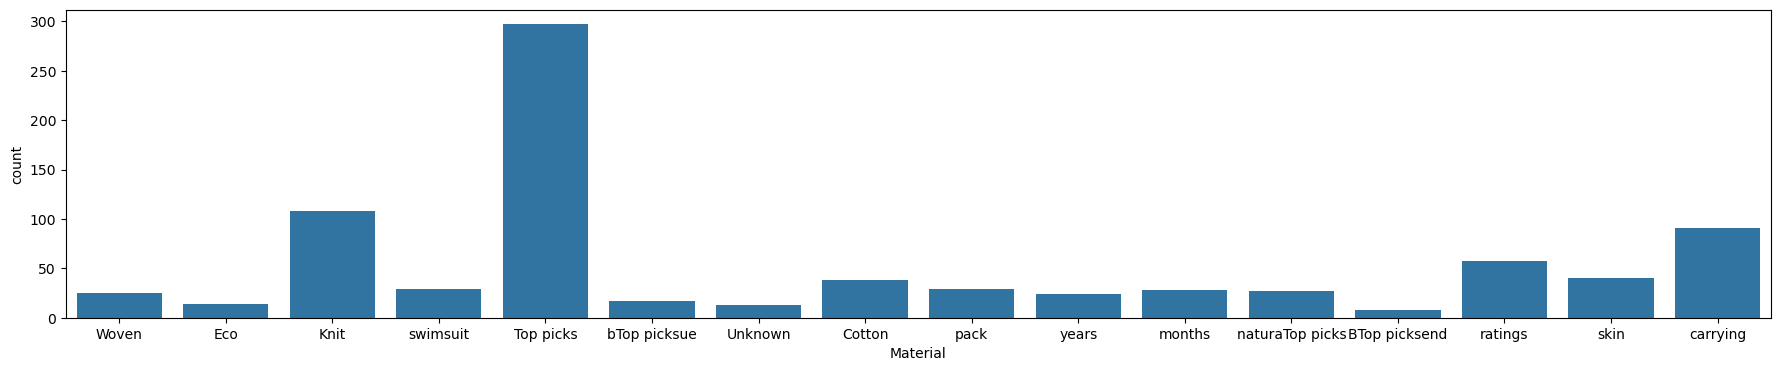

In [60]:
plt.figure(figsize=(22,4))
sns.countplot(x=data["Material"])

### Bivariate Analysis

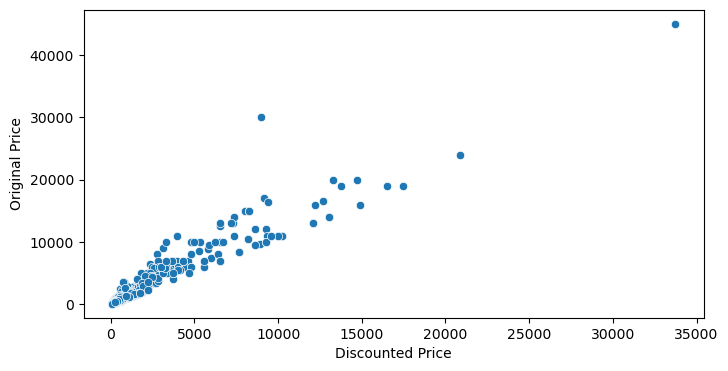

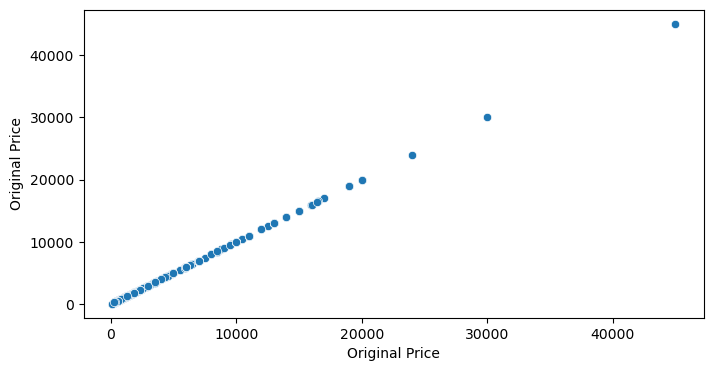

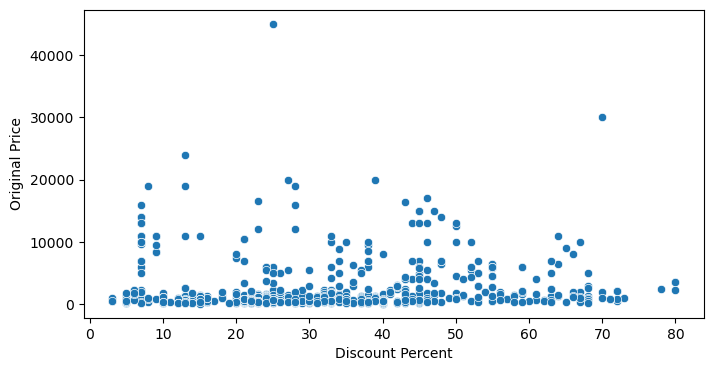

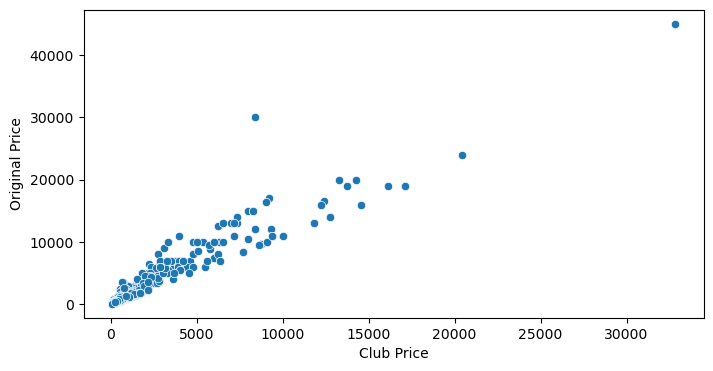

In [64]:
for i in data.select_dtypes(include="number"):
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=data[i], y=data["Original Price"])

#### Categorical vs Numerical

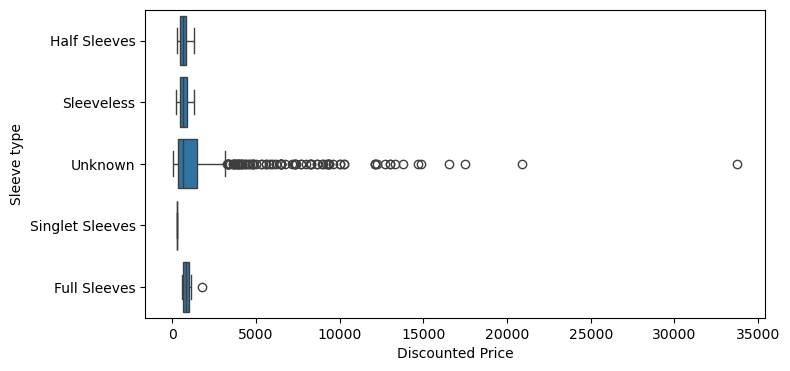

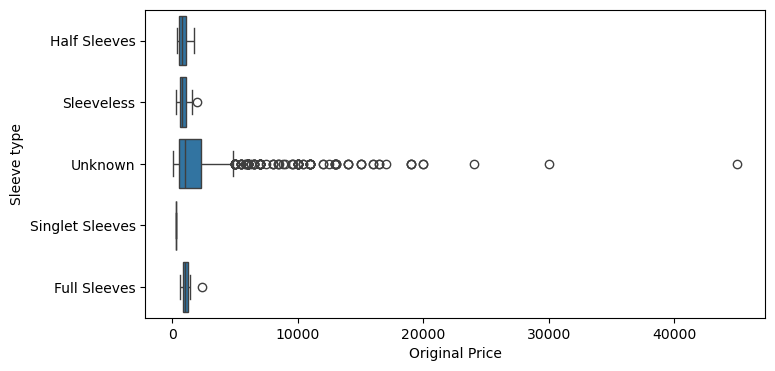

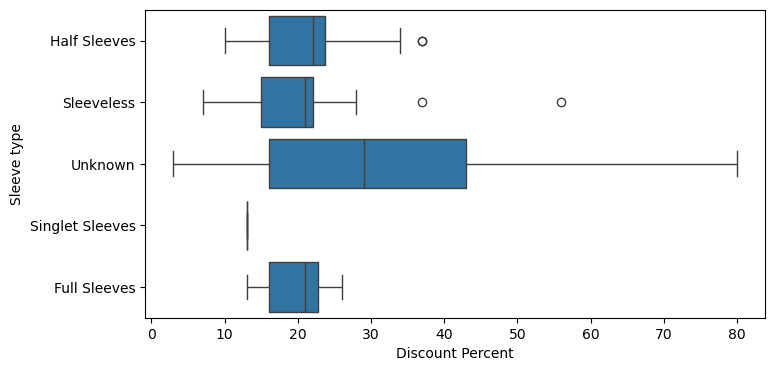

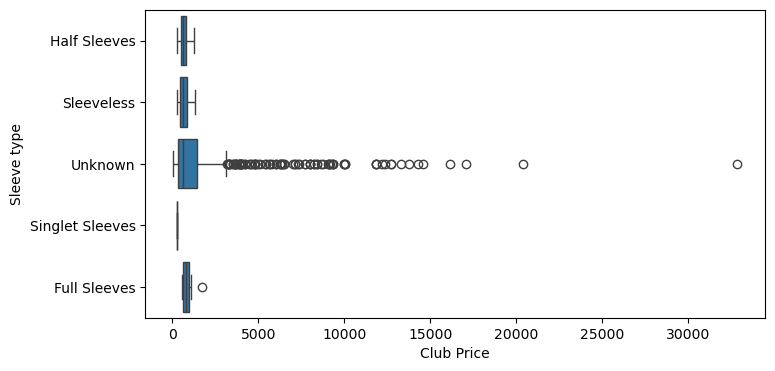

In [62]:
for i in data.select_dtypes(include="number"):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[i], y=data["Sleeve type"])

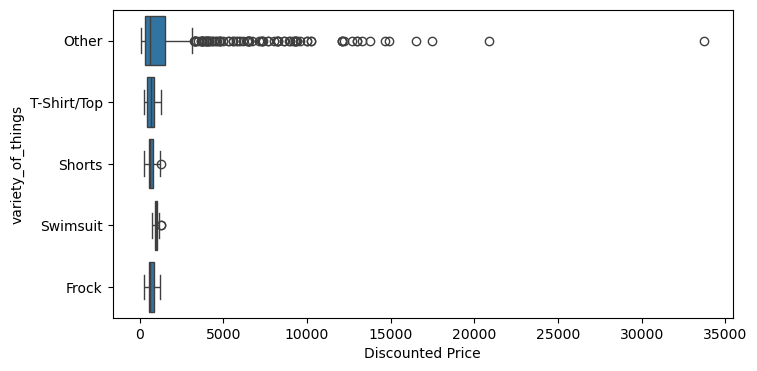

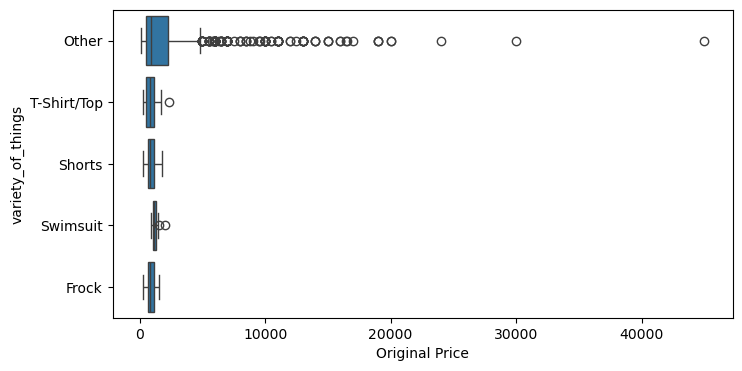

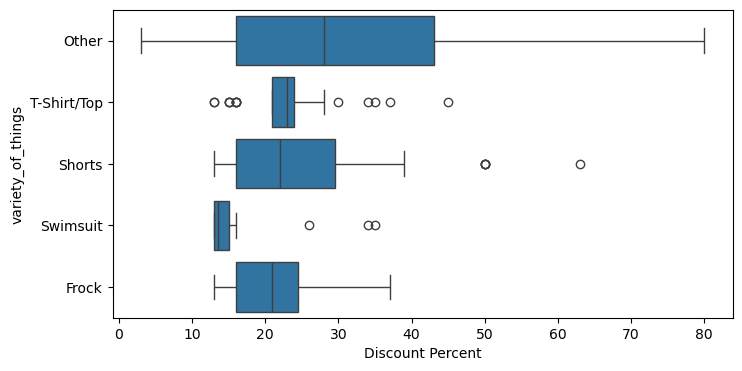

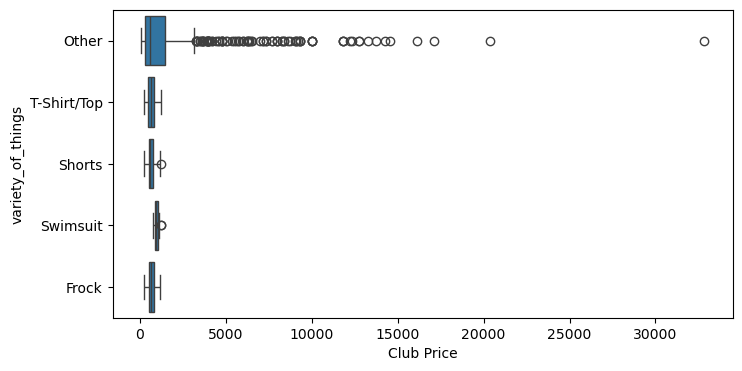

In [63]:
for i in data.select_dtypes(include="number"):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[i], y=data["variety_of_things"])

### Multivariate Analysis

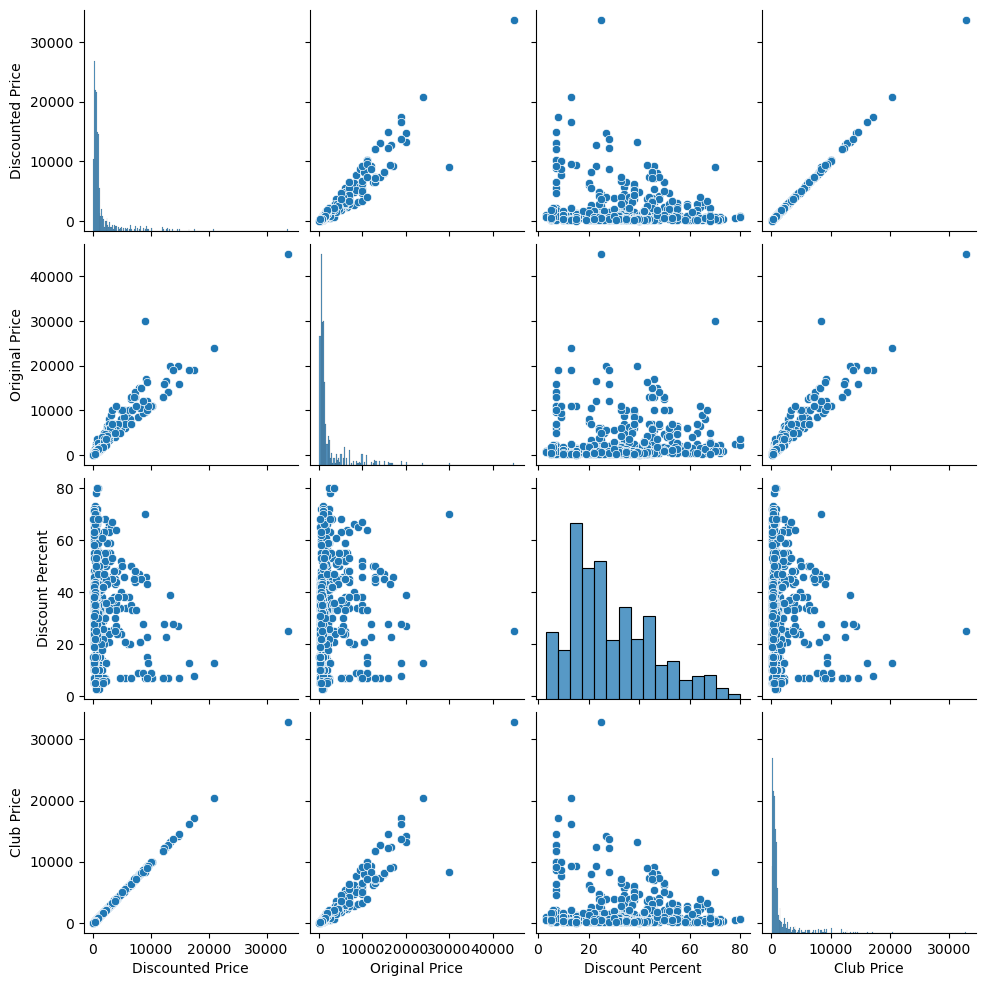

In [67]:
sns.pairplot(data)
plt.show()

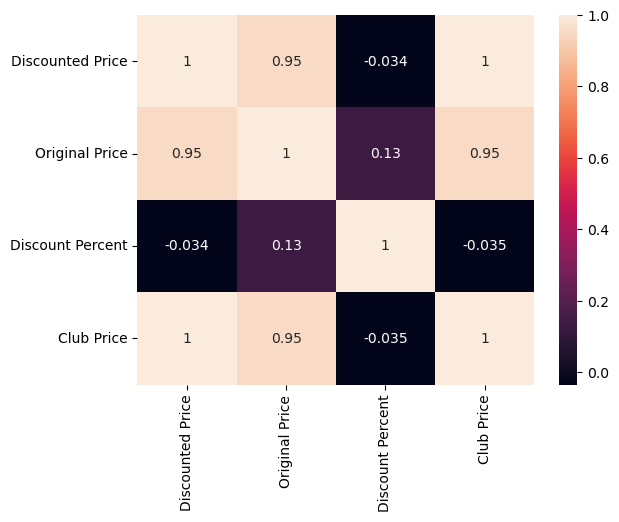

In [66]:
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()